# Coderush Group Project 
## By: Group 4
### Team Members
- Anish Shilpakar
- Shyamron Dongol
- Shivajit Pandit Chhetri
- Amit Duwal

> This Notebook contains necessary code for data cleaning and visualization of the scraped data from Amazon.com  

P.S: We have scraped data for **laptops** from Amazon.com


## Resets

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Necessary imports for data cleaning and visualization

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import re 
import os

To display the pandas table full width and height

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Loading Section

Loading the scraped data

In [3]:
df = pd.read_csv('./data.csv')
print(f"Original Data has shape: {df.shape}")
df.head()

Original Data has shape: (2843, 17)


,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99


In [4]:
len(df['Series'].unique())

1309

Selecting only the required columns suitable for visualization
- Title
- Price
- Rating
- Brand
- Screen Size
- CPU_Model
- Ram
- Graphics
- Disk_size

In [5]:
used_cols = ['Title','Brand','Screen_Size','Ram','Rating','Disk_size','Price']
df = df[used_cols]

In [6]:
df.head(10)

,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,8 GB,4.4,256 GB,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,8 GB,4.4,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,16 GB,3.9,512 GB,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,8 GB,4.2,NaN,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,4 GB,3.9,256 GB,$359.99
5,HP 14in High Performance Laptop (AMD Ryzen 3 3...,HP,14 Inches,4 GB,4.3,128 GB,NaN
6,"HP Envy 34” All-in-One Desktop, NVIDIA GeForce...",HP,34 Inches,32 GB,4.4,NaN,"$2,167.00"
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,16 GB,4.3,256 GB,$818.00
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6 Inches,16 GB,4.5,512 GB,$699.00
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3 Inches,64 GB,5.0,2 TB,"$2,449.99"


## Data Cleaning Section

Checking for nan values in all columns

In [7]:
df.isna().sum()

Title            0
Brand           33
Screen_Size     87
Ram            132
Rating         560
Disk_size      595
Price          980
dtype: int64

Dropping all the nan values from all the columns except rating column

In [8]:
df = df.dropna(subset=['Price','Brand','Screen_Size','Ram','Disk_size'])
df.isna().sum()

Title            0
Brand            0
Screen_Size      0
Ram              0
Rating         189
Disk_size        0
Price            0
dtype: int64

Filling nan values in rating with 0

In [9]:
df['Rating'].fillna(0,inplace=True)
df.isna().sum()

Title          0
Brand          0
Screen_Size    0
Ram            0
Rating         0
Disk_size      0
Price          0
dtype: int64

In [10]:
df.shape

(1448, 7)

Here price is in form $818.0 so replacing it with suitable float value

In [11]:
df.head()

,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,4 GB,3.9,256 GB,$359.99
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,16 GB,4.3,256 GB,$818.00
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6 Inches,16 GB,4.5,512 GB,$699.00
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3 Inches,64 GB,5.0,2 TB,"$2,449.99"
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3 Inches,16 GB,5.0,1 TB,"$1,799.95"


In [12]:
def clean_price(df2):
    df2 = df2.copy()
    df2['Price_dollar'] = [float(re.sub(r'[$,]','',price)) for price in df2['Price']]
    df2['Price_npr'] = [price*132.71 for price in df2['Price_dollar']]
    df2.drop(columns=['Price'],inplace=True)
    return df2

In [13]:
df = clean_price(df)
df.head()

,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price_dollar,Price_npr
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,4 GB,3.9,256 GB,359.99,47774.2729
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,16 GB,4.3,256 GB,818.00,108556.7800
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6 Inches,16 GB,4.5,512 GB,699.00,92764.2900
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3 Inches,64 GB,5.0,2 TB,2449.99,325138.1729
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3 Inches,16 GB,5.0,1 TB,1799.95,238871.3645


Cleaining the column Ram and Disk_size, Here these columns are in form x GB, we only need the numeric value x for visualization, so need to replace these. Also there is value in form x TB so we first need to convert TB to GB

In [14]:
print(df['Ram'].unique())
print(df['Disk_size'].unique())

['4 GB' '16 GB' '64 GB' '32 GB' '8 GB' '128 GB' '12 GB' '20 GB' '24 GB'
 '2 GB' '6 GB' '1 TB' '40 GB' '16 MB']
['256 GB' '512 GB' '2 TB' '1 TB' '3 TB' '4 TB' '320 GB' '128 GB' '32 GB'
 '1000 GB' '1000 TB' '64 GB' '64' '4 GB' '500 GB' '16 GB' '1 GB' '628 GB'
 '160 GB' '6 GB' '256' '512' '6 TB' '1.5 TB' '1512 GB' '1256 GB' '1024 GB'
 '1128 GB' '2000 GB' '0.01 GB' '80 GB' '384 GB' '1' '65 GB' '2' '128 TB']


In [15]:
def clean_ram_disk(df,clean_obj="Ram"):
    df2 = df.copy()
    GB_list = []
    for i in df2[clean_obj]:
        if 'GB' in i:
            GB_list.append((float(i.split(" ")[0])))
        elif 'TB' in i:
            GB_list.append((float(i.split(" ")[0]) * 1024))
        elif 'MB' in i:
            GB_list.append((float(i.split(" ")[0]) / 1024))
        else:
            GB_list.append(float(i))
    df2[clean_obj] = GB_list 
    return df2

In [16]:
df = clean_ram_disk(df,"Ram")
df = clean_ram_disk(df,"Disk_size")
print(df['Ram'].unique())
print(df['Disk_size'].unique())
df.head()

[4.0000e+00 1.6000e+01 6.4000e+01 3.2000e+01 8.0000e+00 1.2800e+02
 1.2000e+01 2.0000e+01 2.4000e+01 2.0000e+00 6.0000e+00 1.0240e+03
 4.0000e+01 1.5625e-02]
[2.56000e+02 5.12000e+02 2.04800e+03 1.02400e+03 3.07200e+03 4.09600e+03
 3.20000e+02 1.28000e+02 3.20000e+01 1.00000e+03 1.02400e+06 6.40000e+01
 4.00000e+00 5.00000e+02 1.60000e+01 1.00000e+00 6.28000e+02 1.60000e+02
 6.00000e+00 6.14400e+03 1.53600e+03 1.51200e+03 1.25600e+03 1.12800e+03
 2.00000e+03 1.00000e-02 8.00000e+01 3.84000e+02 6.50000e+01 2.00000e+00
 1.31072e+05]


,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price_dollar,Price_npr
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,4.0,3.9,256.0,359.99,47774.2729
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6 Inches,16.0,4.3,256.0,818.00,108556.7800
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6 Inches,16.0,4.5,512.0,699.00,92764.2900
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3 Inches,64.0,5.0,2048.0,2449.99,325138.1729
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3 Inches,16.0,5.0,1024.0,1799.95,238871.3645


In [17]:
df.Ram.unique()

array([4.0000e+00, 1.6000e+01, 6.4000e+01, 3.2000e+01, 8.0000e+00,
       1.2800e+02, 1.2000e+01, 2.0000e+01, 2.4000e+01, 2.0000e+00,
       6.0000e+00, 1.0240e+03, 4.0000e+01, 1.5625e-02])

In [18]:
df.Disk_size.unique()

array([2.56000e+02, 5.12000e+02, 2.04800e+03, 1.02400e+03, 3.07200e+03,
       4.09600e+03, 3.20000e+02, 1.28000e+02, 3.20000e+01, 1.00000e+03,
       1.02400e+06, 6.40000e+01, 4.00000e+00, 5.00000e+02, 1.60000e+01,
       1.00000e+00, 6.28000e+02, 1.60000e+02, 6.00000e+00, 6.14400e+03,
       1.53600e+03, 1.51200e+03, 1.25600e+03, 1.12800e+03, 2.00000e+03,
       1.00000e-02, 8.00000e+01, 3.84000e+02, 6.50000e+01, 2.00000e+00,
       1.31072e+05])

Now cleaining the screen size

In [19]:
df.Screen_Size.unique()

array(['12.4 Inches', '15.6 Inches', '17.3 Inches', '15.6', '14 Inches',
       '17 Inches', '16 Inches', '16.2 Inches', '16', '13.4 Inches', '14',
       '12.3 Inches', '11.6 Inches', '13', '13.1 Inches', '12 Inches',
       '13.3', '10.1 Inches', '14.1 Inches', '11.6', '13.3 Inches',
       '13.5 Inches', '10.4 Inches', '13 Inches', '15.4 Inches',
       '15 Inches', '17', '17.3', '12.2 Inches', '15', '14.2 Inches',
       '18.4 Inches', '17.25 Inches', '14.5', '12.1 Inches', '11 Inches',
       '10.5 Inches', '11', '116 Inches', '16.6 Inches', '14.4 Inches',
       '13.5', '12.45 Inches'], dtype=object)

In [20]:
def clean_screen_size(df):
    df2 = df.copy()
    df2['Screen_Size'] = [float(screen_size.split()[0]) for screen_size in df2['Screen_Size']]
    df2.loc[df2['Screen_Size'] == 116.,'Screen_Size'] = 11.6
    return df2 

In [21]:
df = clean_screen_size(df)
df.Screen_Size.unique()

array([12.4 , 15.6 , 17.3 , 14.  , 17.  , 16.  , 16.2 , 13.4 , 12.3 ,
       11.6 , 13.  , 13.1 , 12.  , 13.3 , 10.1 , 14.1 , 13.5 , 10.4 ,
       15.4 , 15.  , 12.2 , 14.2 , 18.4 , 17.25, 14.5 , 12.1 , 11.  ,
       10.5 , 16.6 , 14.4 , 12.45])

In [22]:
df.head()

,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price_dollar,Price_npr
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,4.0,3.9,256.0,359.99,47774.2729
7,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,16.0,4.3,256.0,818.00,108556.7800
8,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,16.0,4.5,512.0,699.00,92764.2900
9,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,64.0,5.0,2048.0,2449.99,325138.1729
10,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,16.0,5.0,1024.0,1799.95,238871.3645


In [23]:
df.isna().sum()

Title           0
Brand           0
Screen_Size     0
Ram             0
Rating          0
Disk_size       0
Price_dollar    0
Price_npr       0
dtype: int64

Now removing the duplicate rows from the dataframe, considering those rows with same Title as duplicates and removing them

In [24]:
df['Title'].duplicated().value_counts()

False    1182
True      266
Name: Title, dtype: int64

In [25]:
df.drop_duplicates(subset='Title', inplace=True)
df['Title'].duplicated().value_counts()

False    1182
Name: Title, dtype: int64

In [26]:
df.reset_index(drop=True,inplace=True)
print(df.shape)
df.head()

(1182, 8)


,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price_dollar,Price_npr
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,4.0,3.9,256.0,359.99,47774.2729
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,16.0,4.3,256.0,818.00,108556.7800
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,16.0,4.5,512.0,699.00,92764.2900
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,64.0,5.0,2048.0,2449.99,325138.1729
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,16.0,5.0,1024.0,1799.95,238871.3645


## Exporting the Cleaned Data

In [ ]:
dataset_path = './laptop_data_cleaned.csv'

In [ ]:
df.to_csv(dataset_path,index=False)

## Visualization Section

Loading the cleaned data

In [ ]:
df_cleaned = pd.read_csv(dataset_path)
df_cleaned.drop(columns=["Price_npr","Rating"],inplace=True)
print(f"Cleaned data has shape: {df_cleaned.shape}")
df_cleaned.head()

Cleaned data has shape: (1182, 6)


,Title,Brand,Screen_Size,Ram,Disk_size,Price_dollar
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,4.0,256.0,359.99
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,16.0,256.0,818.00
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,16.0,512.0,699.00
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,64.0,2048.0,2449.99
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,16.0,1024.0,1799.95


In [ ]:
# df_cleaned.Disk_size.value_counts()

Considering the disk_size less than 10 GB as outliers and removing them

In [ ]:
# df_cleaned = df_cleaned[df_cleaned.Disk_size > 10]
# df_cleaned.Disk_size.value_counts()

1024.0       257
512.0        233
256.0        122
64.0          79
128.0         62
32.0          42
2048.0        35
1000.0        20
500.0         15
16.0          14
4096.0        10
320.0          7
1256.0         5
160.0          4
1512.0         3
1128.0         3
1024000.0      1
3072.0         1
628.0          1
6144.0         1
1536.0         1
2000.0         1
80.0           1
384.0          1
65.0           1
Name: Disk_size, dtype: int64

### Correlation plot to check correlation between various columns in dataset

In [ ]:
import matplotlib
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 15)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['Brand']= en.fit_transform(df['Brand'])

In [ ]:
df

,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price_dollar,Price_npr
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",27,12.40,4.000000,3.9,256.00,359.99,47774.2729
1,Dell Latitude 3510 Business Laptop Black (Inte...,12,15.60,16.000000,4.3,256.00,818.00,108556.7800
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",26,15.60,16.000000,4.5,512.00,699.00,92764.2900
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",26,17.30,64.000000,5.0,2048.00,2449.99,325138.1729
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",2,17.30,16.000000,5.0,1024.00,1799.95,238871.3645
5,EXCaliberPC 2022 MSI Pulse GL76 12UGK-256 (i7-...,14,17.30,16.000000,4.1,512.00,1699.00,225474.2900
6,EXCaliberPC 2022 MSI Raider GE76 12UH-655 Pro ...,14,17.30,64.000000,5.0,3072.00,4345.00,576624.9500
7,EXCaliberPC 2022 ASUS ROG Strix Scar 15 G533ZM...,14,15.60,16.000000,5.0,512.00,1799.00,238745.2900
8,"2022 MSI Titan GT77 12UGS-009 (i7-12800HX, 32G...",14,17.30,32.000000,5.0,4096.00,3295.00,437279.4500
9,"GIGABYTE A5 X1 - 15.6"" FHD IPS Anti-Glare 240H...",16,15.60,16.000000,4.1,512.00,1399.00,185661.2900


                 Brand  Screen_Size       Ram    Rating  Disk_size  \
Brand         1.000000    -0.174382  0.040511 -0.098060   0.029847   
Screen_Size  -0.174382     1.000000  0.129702  0.033485   0.012039   
Ram           0.040511     0.129702  1.000000 -0.114454   0.004874   
Rating       -0.098060     0.033485 -0.114454  1.000000   0.013331   
Disk_size     0.029847     0.012039  0.004874  0.013331   1.000000   
Price_dollar  0.121246     0.330730  0.321909 -0.295571   0.005416   
Price_npr     0.121246     0.330730  0.321909 -0.295571   0.005416   

              Price_dollar  Price_npr  
Brand             0.121246   0.121246  
Screen_Size       0.330730   0.330730  
Ram               0.321909   0.321909  
Rating           -0.295571  -0.295571  
Disk_size         0.005416   0.005416  
Price_dollar      1.000000   1.000000  
Price_npr         1.000000   1.000000  


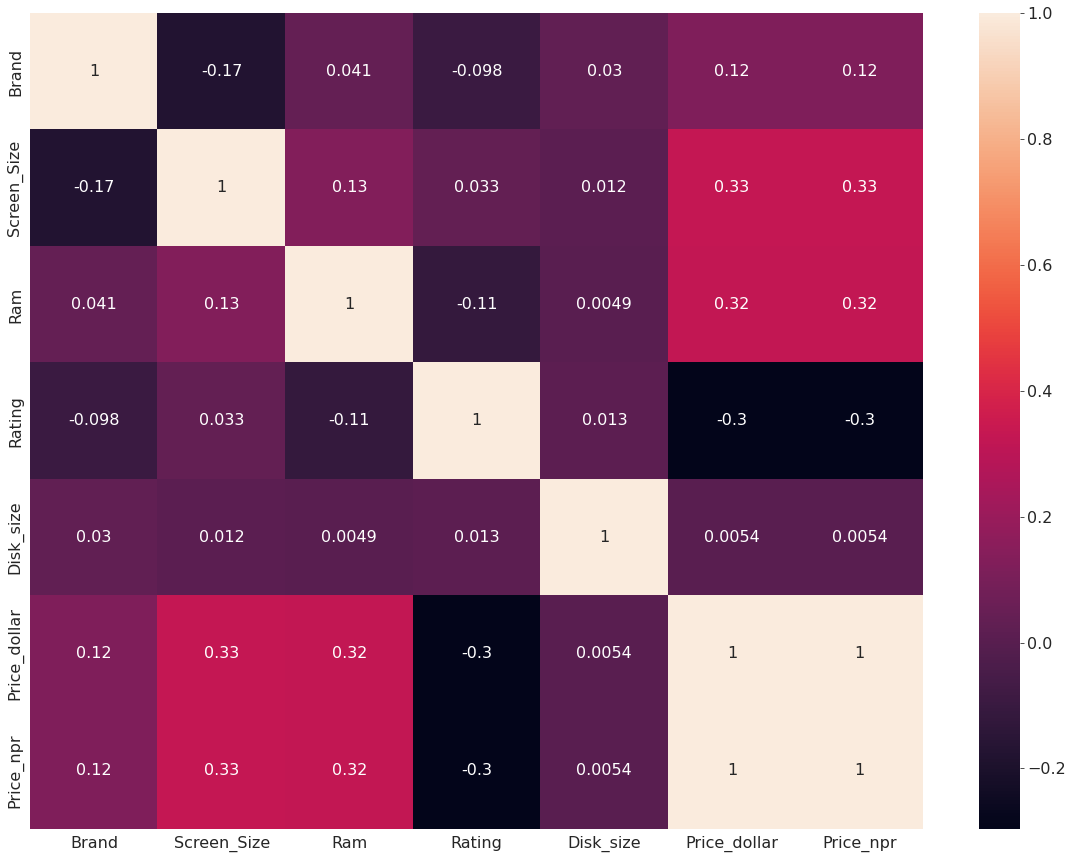

In [ ]:
sns.color_palette("flare", as_cmap=True)
corr = df.corr()
print(corr)
# Plot the heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

This correlation heatmap shows correlation between Screen Size, disk size and Ram with the Price in dollar. 
- It can be seen that the price has highest correlation of 0.33 with Screen size which indicates that laptops with greater screen size are more expensive
- Similarly, Ram has correlation of 0.31 with the Price. This indicates that expensive laptops have higher Ram.
- Disk Size however doesn't have much correlation with Price of laptop
The same correlation can be seen in form of bar plot below

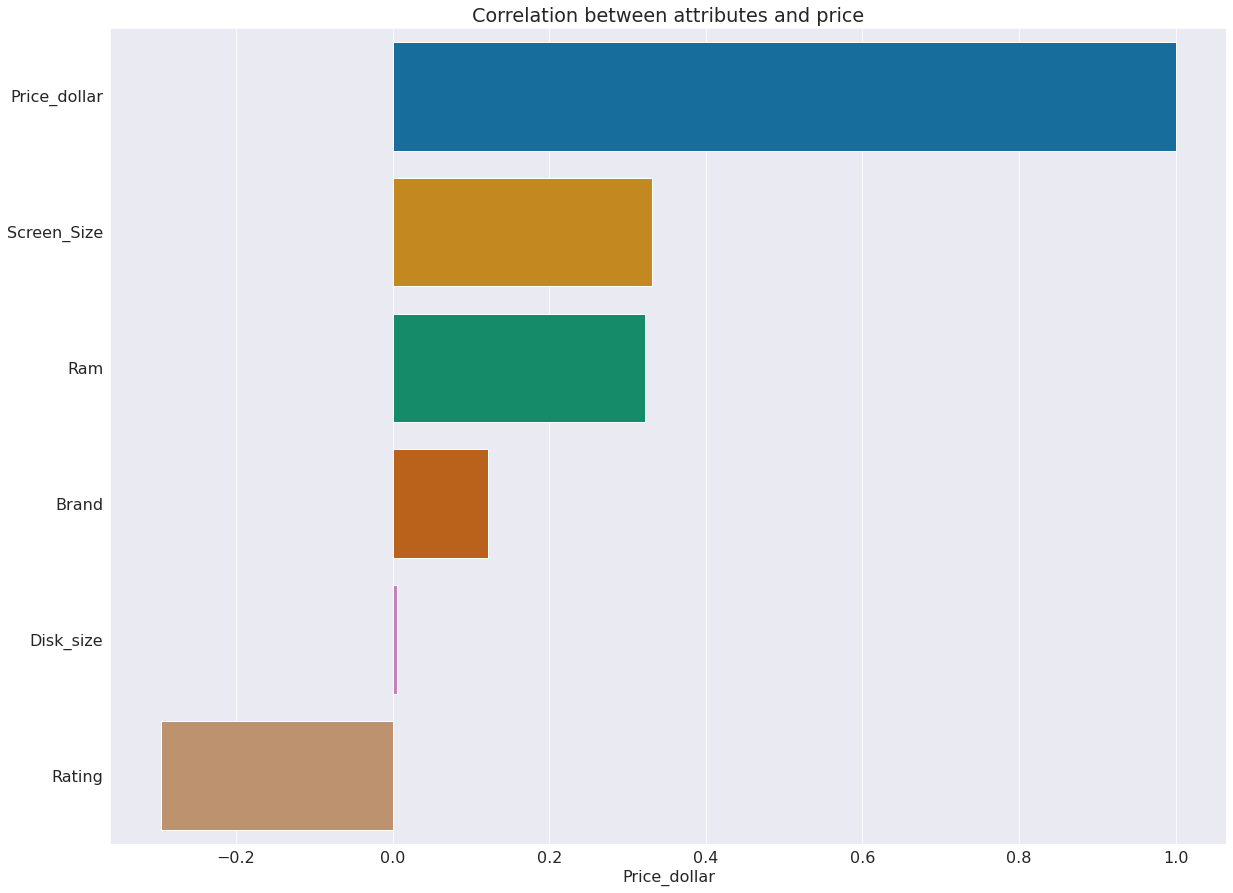

In [ ]:
corr = corr.Price_dollar;
cr = corr.sort_values(ascending=False)[1:];
sns.barplot(x=cr,y=cr.index,palette="colorblind");
plt.title("Correlation between attributes and price");

### Distribution of Laptops by brands in dataset

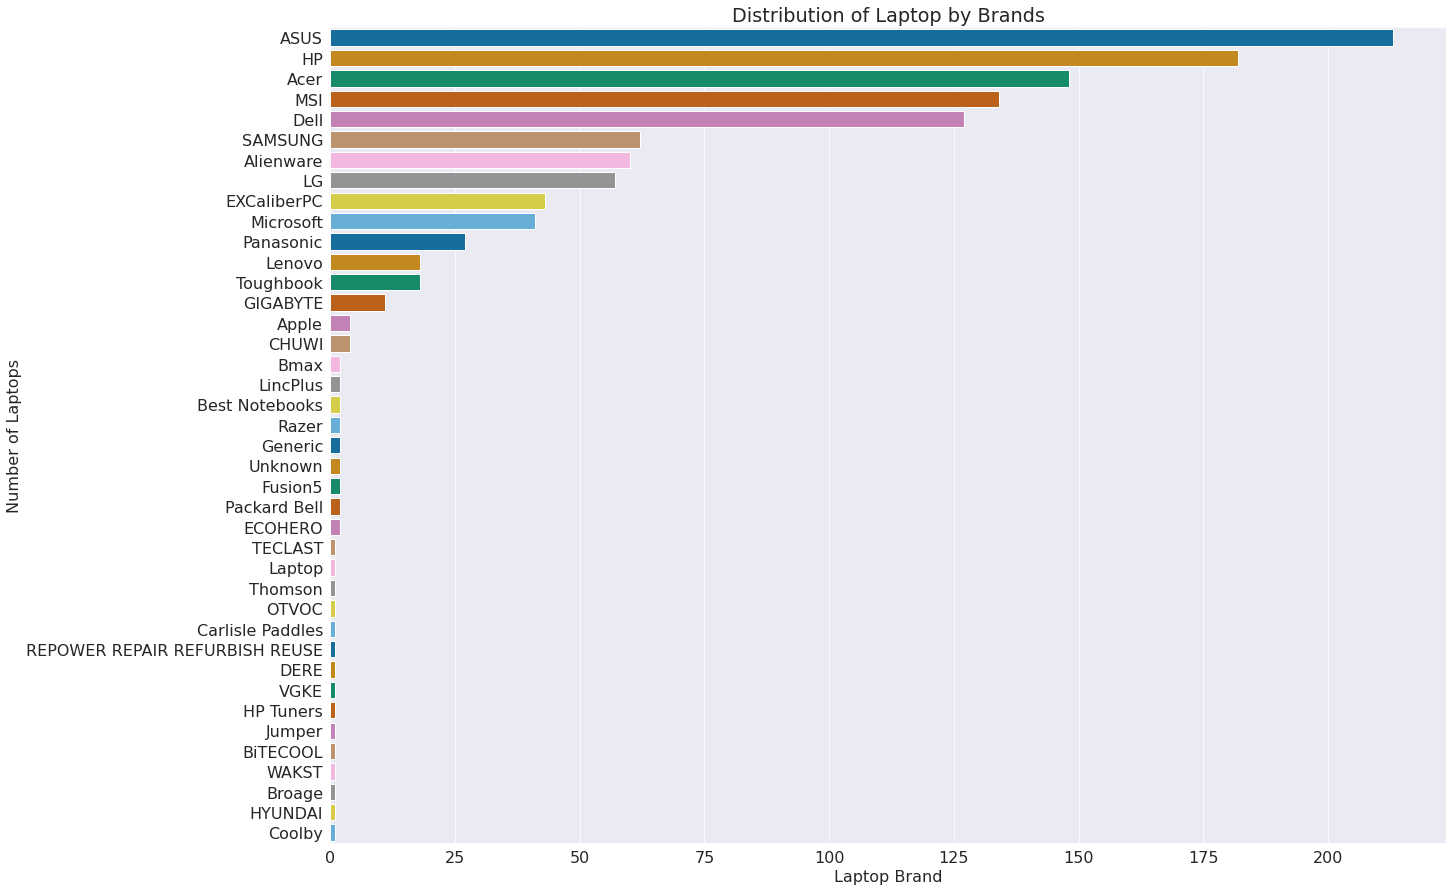

In [ ]:
brand_values = df_cleaned.Brand.value_counts()
sns.barplot(y=brand_values.index,x=brand_values.values,palette='colorblind')
plt.xlabel("Laptop Brand")
plt.ylabel("Number of Laptops")
plt.title("Distribution of Laptop by Brands")
plt.show()

This plot signifies that the top 5 most available laptop brands are Asus, HP, Acer, MSI, Dell

### Top 10 Expensive and Cheapest Laptops

In [ ]:
def first_five_words(sentence):
    words = sentence.split()
    words_5 = words[:5]
    new_sentence = []
    for i, word in enumerate(words_5):
        if (i + 1) % 1 == 0:
            new_sentence.append(word + '\n')
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)

Finding the most expensive laptops

In [ ]:
df_cleaned[['Title','Price_dollar']].sort_values(by="Price_dollar",ascending=False)[:10]

,Title,Price_dollar
607,Dell Alienware X17 R1 Gaming Laptop (2021) | 1...,6599.00
405,EXCaliberPC 2023 MSI Titan GT77HX 13VH-046US P...,6089.00
76,2022 MSI CreatorPro X17 A12UKS-059 (i9-12900HX...,5199.00
14,2022 MSI Creator Z17 A12UHT-048 Pro Extreme (i...,5195.00
333,PANASONIC TOUGHBOOK/CF-31/core i7/Intel Core i...,4999.99
569,"Dell Alienware Area 51M Gaming Laptop 17.3"" 1T...",4999.95
545,"Dell Alienware Area 51M Laptop, 17.3"" FHD (192...",4999.81
84,"MSI GE75 Raider 10SGS-222 17.3"" 300Hz 3ms Gami...",4999.00
549,"Dell Alienware Area 51M Laptop, 17.3"" FHD (192...",4999.00
157,"2022 MSI Raider GE67HX 12UHS-069 (i9-12900HX, ...",4945.00


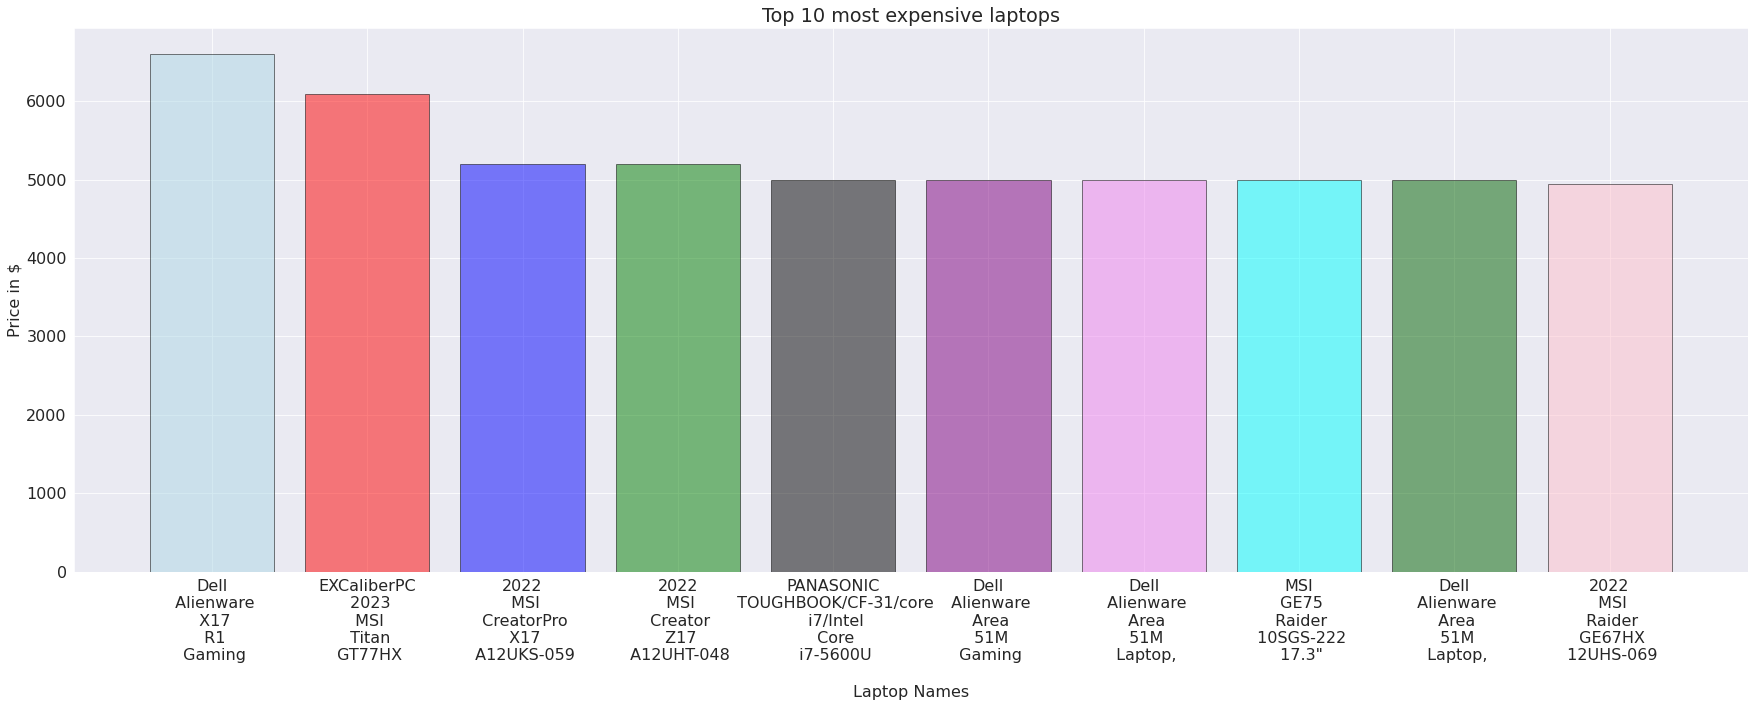

In [ ]:
top10 = df_cleaned.nlargest(10,'Price_dollar')
max_list=[]
for title_name in top10['Title']:
    max_list.append(first_five_words(title_name))
# print(max_list)
fig, ax = plt.subplots()
ax.set_xticks(range(10))
ax.set_xticklabels(max_list)
ax = plt.bar(top10['Title'], top10['Price_dollar'],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
fig.set_size_inches(30, 10)
plt.xlabel("Laptop Names")
plt.ylabel("Price in $")
plt.title("Top 10 most expensive laptops")
plt.show()
# print(top10['Title'])

The above plot shows top 10 most expensive laptops in our dataset. It can be seen that the Dell Alienware X17 R1 Gaming laptop is the most expensive laptop which costs $6599

Finding the most cheapest laptops

In [ ]:
df_cleaned[['Title','Price_dollar']].sort_values(by="Price_dollar",ascending=True)[:10]

,Title,Price_dollar
981,"Samsung Chromebook (Wi-Fi, 11.6-Inch) 2012 Model",38.98
808,SAMSUNG XE500C13-K03US Chromebook 3 - 11.6 HD ...,45.99
770,"Samsung Chromebook 3, 11.6"", 4GB RAM, 16GB eMM...",46.98
965,"SAMSUNG 11.6"" Chromebook with Intel N3060 up t...",49.95
998,Samsung Chromebook 3 XE500C13-K01US 2 GB RAM 1...,49.99
983,Samsung Chromebook 2 11.6 Inch Laptop (Samsung...,49.99
967,"Samsung 11.6"" LED 16GB Chromebook Exynos 5 Dua...",49.99
1016,REPOWER REPAIR REFURBISH REUSE Samsung Chromeb...,54.98
954,"Samsung Chromebook 3 XE501C13-K02US, Intel Dua...",67.98
958,"SAMSUNG Chromebook 3 XE501C13-K01US, Intel Dua...",69.90


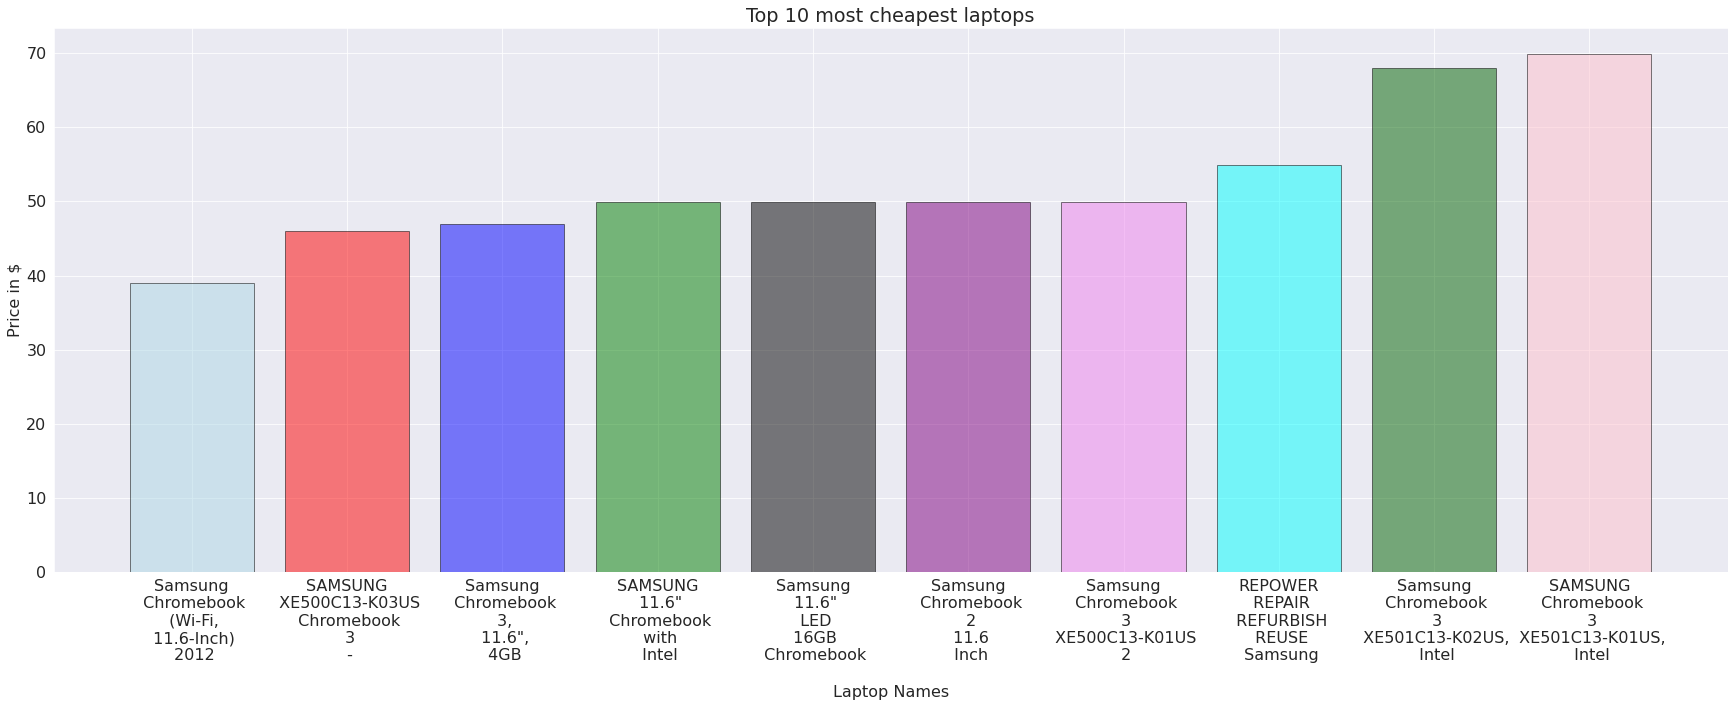

In [ ]:
top10 = df_cleaned.nsmallest(10,'Price_dollar')
max_list=[]
for title_name in top10['Title']:
    max_list.append(first_five_words(title_name))
# print(max_list)
fig, ax = plt.subplots()
ax.set_xticks(range(10))
ax.set_xticklabels(max_list)
ax = plt.bar(top10['Title'], top10['Price_dollar'],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
fig.set_size_inches(30, 10)
plt.xlabel("Laptop Names")
plt.ylabel("Price in $")
plt.title("Top 10 most cheapest laptops")
plt.show()
# print(top10['Title'])

This plot shows that Samsung Chromebook(Wi-Fi 11.6-inch) 2012 is the cheapest laptop in our dataset and it costs about $38.98

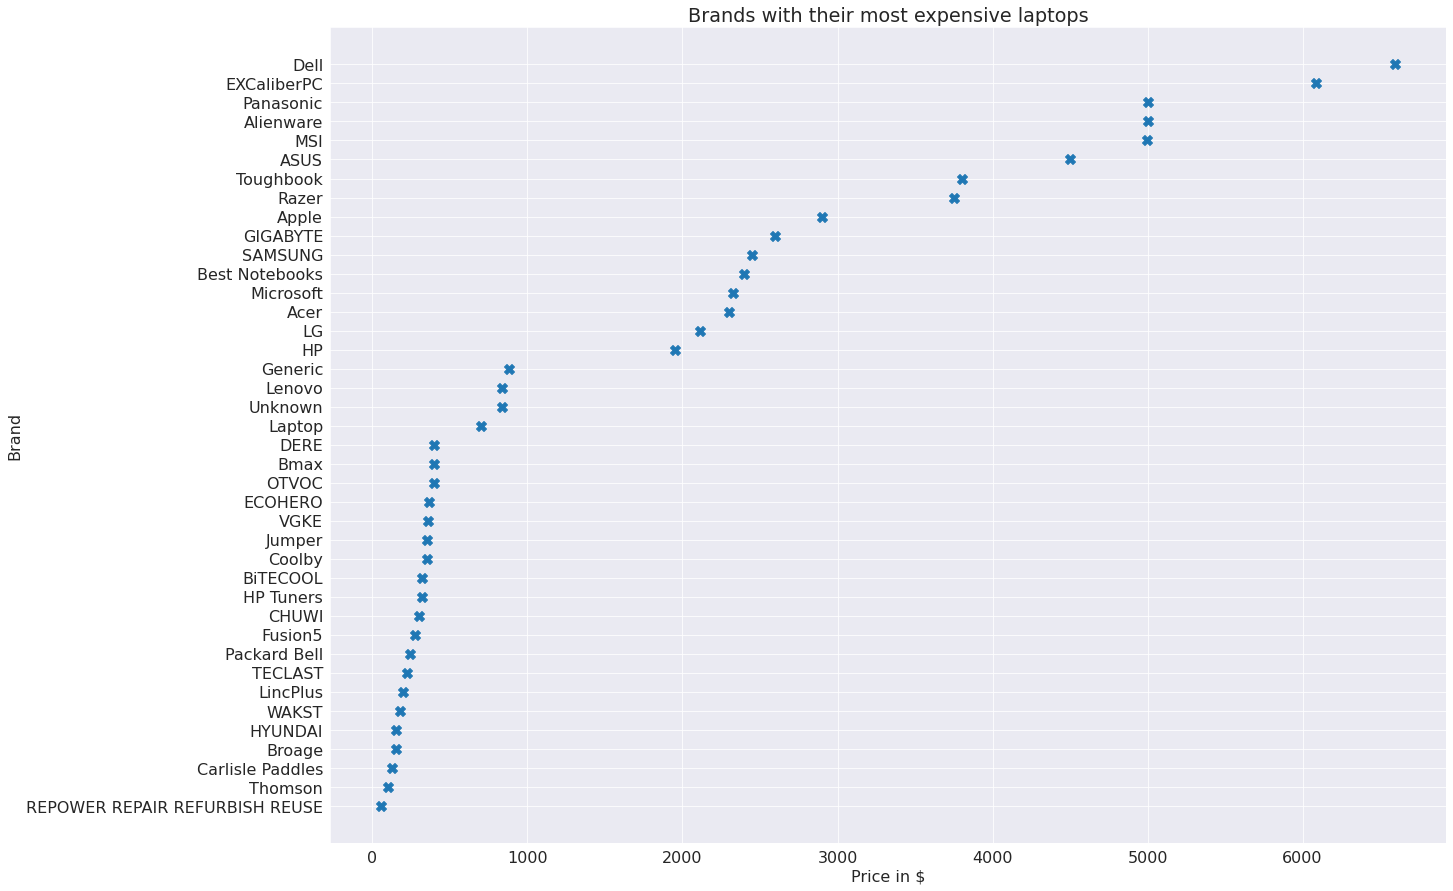

In [ ]:
grouped = df_cleaned.groupby('Brand')
result = grouped['Price_dollar'].max()
result = result.sort_values(ascending=True)
# print(result)
# set figsize
# sns.scatterplot(y=result.index,x=result.values,palette="colorblind")
sc = plt.scatter(x=result.values,y=result.index, s=100,marker="X")

plt.xlabel("Price in $")
plt.ylabel("Brand")
plt.title("Brands with their most expensive laptops")

plt.show()

This plot shows the rank of most expensive laptops of each brand. It also signifies that Dell brand has the most expensive laptop that costs above 6000 $. 

Brand
Razer             3074.490000
Toughbook         2817.653889
EXCaliberPC       2642.958140
Panasonic         2611.807037
Alienware         2366.322167
Apple             2200.640000
Best Notebooks    1849.000000
GIGABYTE          1775.333636
MSI               1555.919552
LG                1345.242456
Name: Price_dollar, dtype: float64


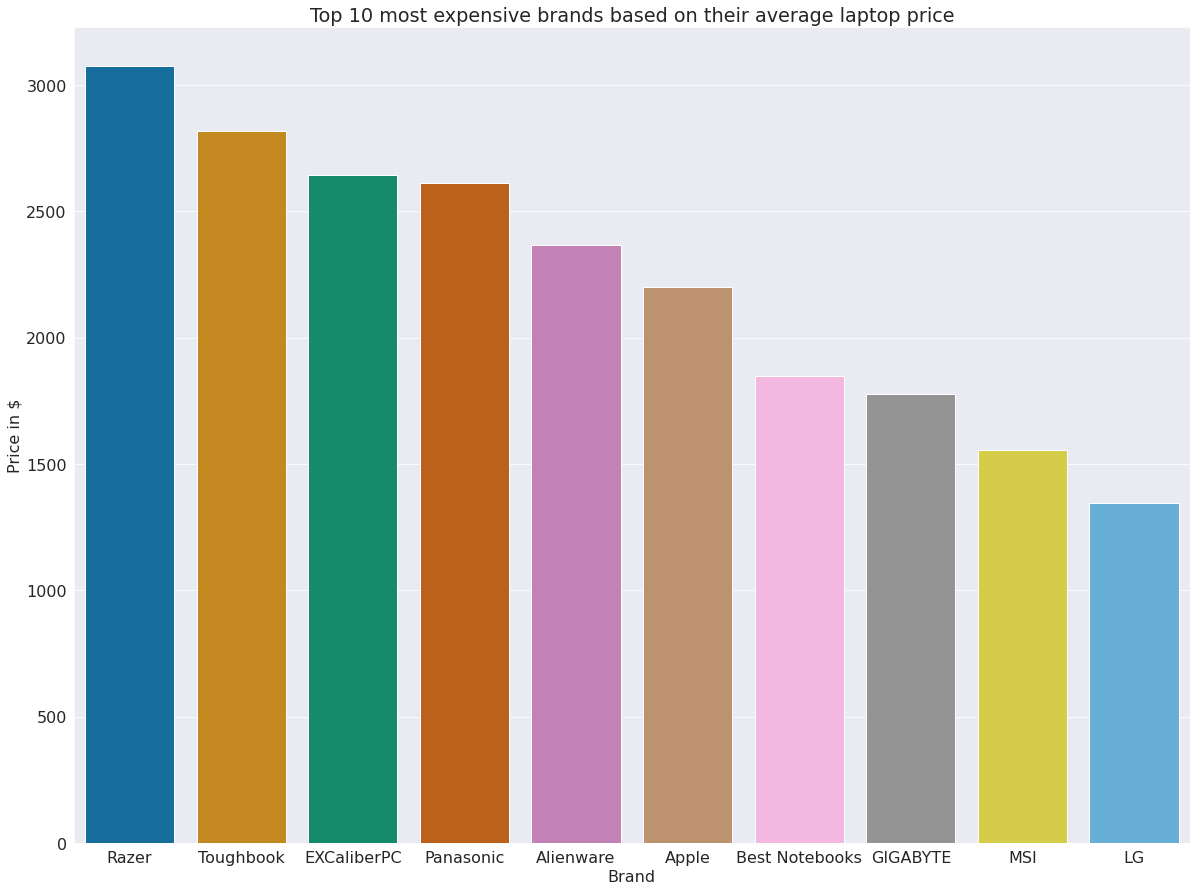

In [ ]:
grouped = df_cleaned.groupby('Brand')
result = grouped['Price_dollar'].mean()
result = result.sort_values(ascending=False)[:10]
print(result)
# set figsize
# plt.figure(figsize=(15,10))
sns.barplot(x=result.index,y=result.values,palette="colorblind")
plt.xlabel("Brand")
plt.ylabel("Price in $")
plt.title("Top 10 most expensive brands based on their average laptop price")
plt.show()

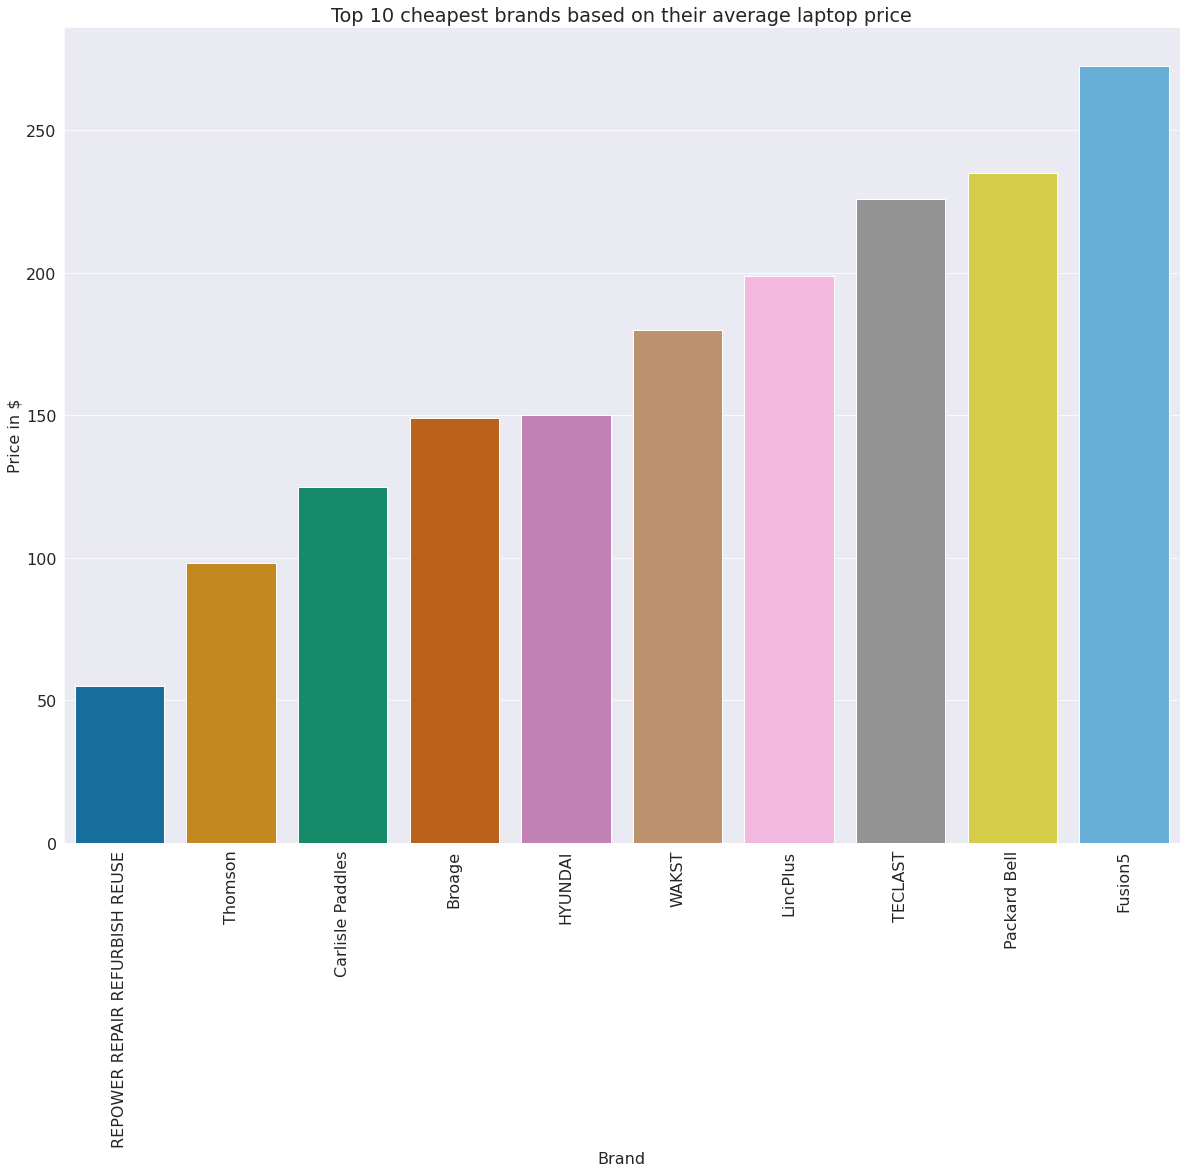

In [ ]:
grouped = df_cleaned.groupby('Brand')
result = grouped['Price_dollar'].mean()
result = result.sort_values(ascending=True)[:10]
# print(result)
# set figsize
# plt.figure(figsize=(15,10))
sns.barplot(x=result.index,y=result.values,palette="colorblind")
plt.xlabel("Brand")
plt.ylabel("Price in $")
plt.xticks(rotation="vertical")
plt.title("Top 10 cheapest brands based on their average laptop price")
plt.show()

**Bar Plot based on average laptop price in each brand**

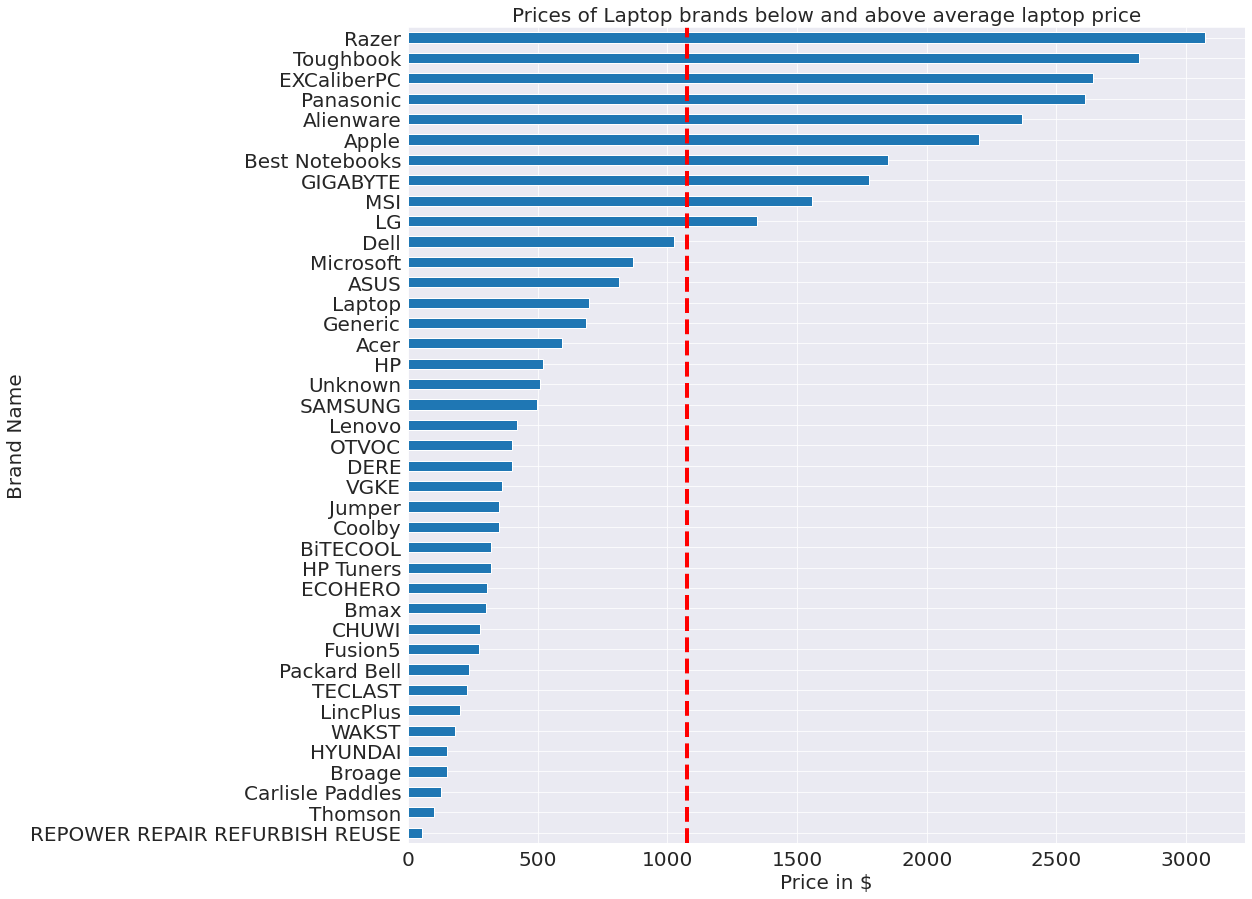

In [ ]:
df_cleaned[['Brand','Price_dollar']].groupby('Brand').mean().sort_values(by='Price_dollar', ascending = True).plot(kind = 'barh', grid = True, figsize = (15,15), 
        fontsize = 20, rot =0, legend = None)
plt.axvline(df_cleaned['Price_dollar'].mean(), color='r', linestyle='dashed', linewidth=4,label='the mean')
plt.xlabel('Price in $', fontsize = 20)
plt.ylabel('Brand Name', fontsize = 20)
plt.title("Prices of Laptop brands below and above average laptop price", fontsize = 20)
plt.show()

In [ ]:
df_cleaned.shape

(1182, 8)

This plot shows that the average laptop price of all laptops in dataset is around $1200. It also shows the laptop brands whose price is greater than this average price and those laptop brands whose price is less than this average price

**Scatter Plot for Brands and Price**

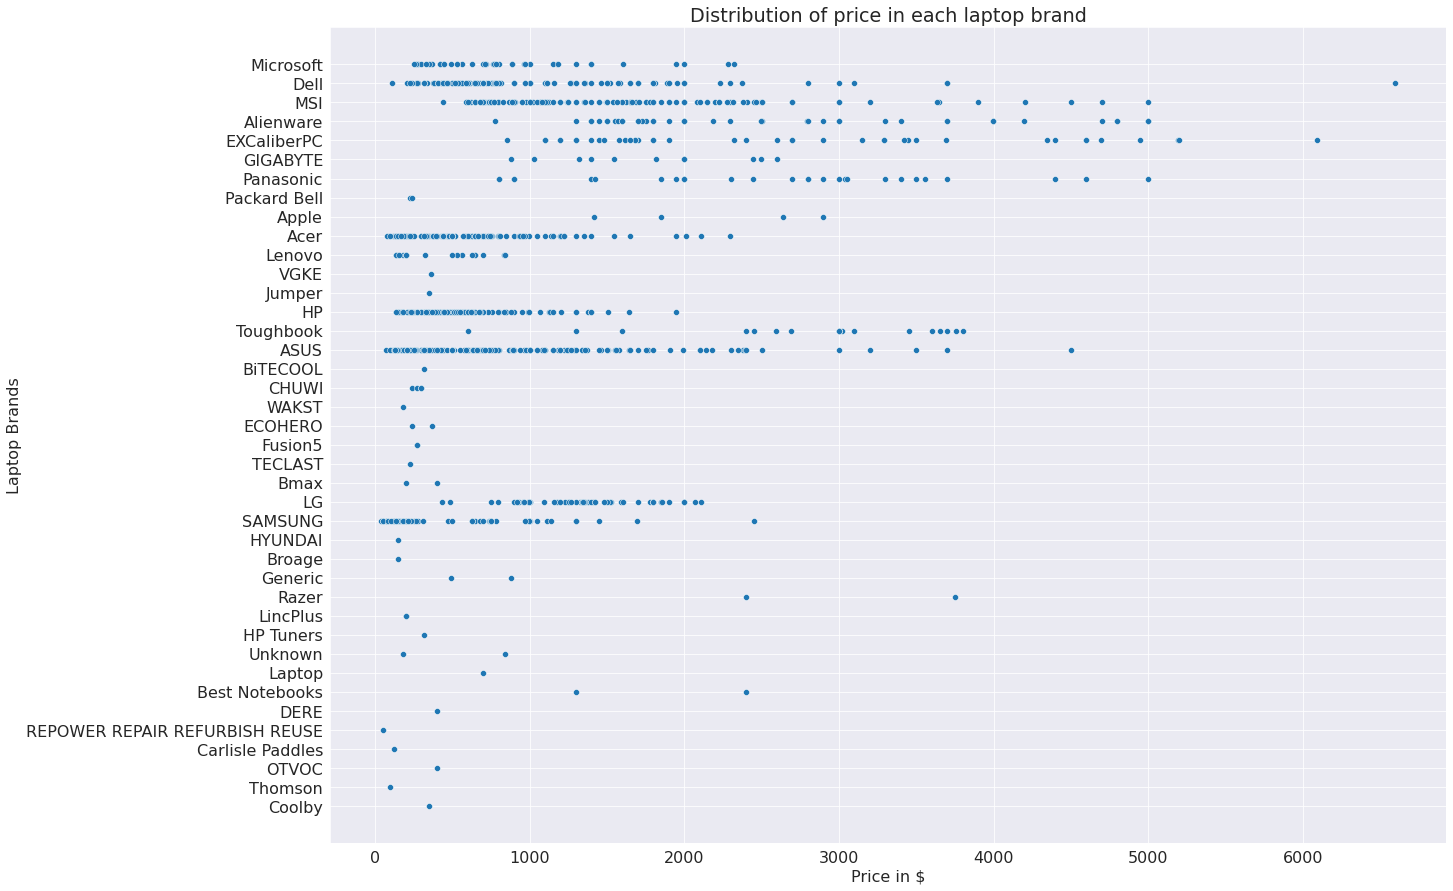

In [ ]:
sns.scatterplot(y=df_cleaned["Brand"],x=df_cleaned["Price_dollar"],palette="colorblind")
plt.xlabel("Price in $")
plt.ylabel("Laptop Brands")
plt.title("Distribution of price in each laptop brand")
plt.show()

### Top 10 Highest Rated Laptops

In [ ]:
df_cleaned = pd.read_csv(dataset_path)
print(f"Cleaned data has shape: {df_cleaned.shape}")
df_cleaned.head()

Cleaned data has shape: (1182, 8)


,Title,Brand,Screen_Size,Ram,Rating,Disk_size,Price_dollar,Price_npr
0,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4,4.0,3.9,256.0,359.99,47774.2729
1,Dell Latitude 3510 Business Laptop Black (Inte...,Dell,15.6,16.0,4.3,256.0,818.00,108556.7800
2,"MSI Bravo 15 15.6"" 144Hz Gaming Laptop: AMD Ry...",MSI,15.6,16.0,4.5,512.0,699.00,92764.2900
3,"MSI Latest GE76 Raider Gaming Laptop | 17.3"" 1...",MSI,17.3,64.0,5.0,2048.0,2449.99,325138.1729
4,"Alienware m15 15.6"" Gaming Notebook i7-8750H 1...",Alienware,17.3,16.0,5.0,1024.0,1799.95,238871.3645


In [ ]:
df_cleaned[['Title','Rating']].sort_values(by="Rating",ascending=False)[:10]

,Title,Rating
1055,"Dell Inspiron 3511 Laptop, 15.6"" Full HD Touch...",5.0
650,"HP 2022 15.6"" HD Laptop, Intel Pentium N5030 P...",5.0
190,"Acer 2022 Aspire 5 14"" FHD IPS Thin & Light La...",5.0
769,ASUS VivoBook 15 Thin and Light 15.6” FHD Busi...,5.0
395,MSI Modern 14 Ultra Thin and Light Professiona...,5.0
677,2022 Flagship HP X360 Chromebook Spin 2-in-1 C...,5.0
671,"HP Envy 17T Laptop i7-1195G7 11th gen, 16GB RA...",5.0
549,"Dell Alienware Area 51M Laptop, 17.3"" FHD (192...",5.0
325,"Panasonic Toughpad FZ-G1-10.1"" - Core i5 6300U...",5.0
87,EXCaliberPC 2022 MSI Vector GP76 12UGS-298 (i7...,5.0


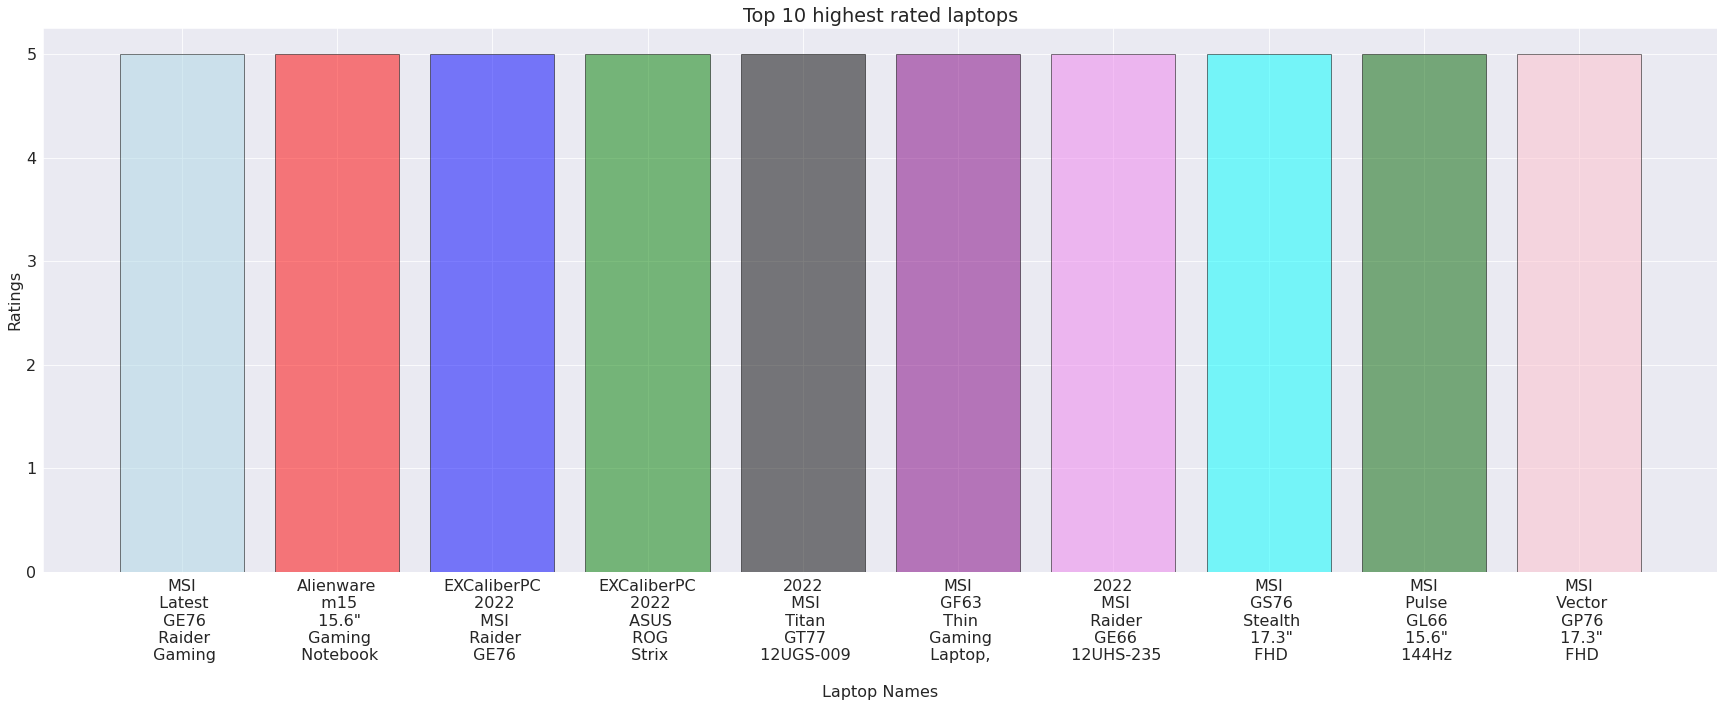

In [ ]:
top10 = df_cleaned.nlargest(10,'Rating')
max_list=[]
for title_name in top10['Title']:
    max_list.append(first_five_words(title_name))
# print(max_list)
fig, ax = plt.subplots()
ax.set_xticks(range(10))
ax.set_xticklabels(max_list)
ax = plt.bar(top10['Title'], top10['Rating'],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
fig.set_size_inches(30, 10)
plt.xlabel("Laptop Names")
plt.ylabel("Ratings")
plt.title("Top 10 highest rated laptops")
plt.show()
# print(top10['Title'])

### Visualization of distribution of ratings

In [ ]:
rating_counts = df_cleaned.Rating.value_counts().sort_index(ascending=False)
# rating_counts

In [ ]:
rating_dict = {
    "5": rating_counts[rating_counts.index == 5].sum(),
    "4 to 5":  rating_counts[(rating_counts.index < 5) & (rating_counts.index >= 4)].sum(),
    "3 to 4":  rating_counts[(rating_counts.index < 4) & (rating_counts.index >= 3)].sum(),
    "2 to 3":  rating_counts[(rating_counts.index < 3) & (rating_counts.index >= 2)].sum(),
    "1 to 2":  rating_counts[(rating_counts.index < 2) & (rating_counts.index >= 1)].sum(),
    "0 to 1":  rating_counts[(rating_counts.index < 1) & (rating_counts.index >= 0)].sum()
}
rating_dict

{'5': 116,
 '4 to 5': 722,
 '3 to 4': 146,
 '2 to 3': 18,
 '1 to 2': 3,
 '0 to 1': 177}

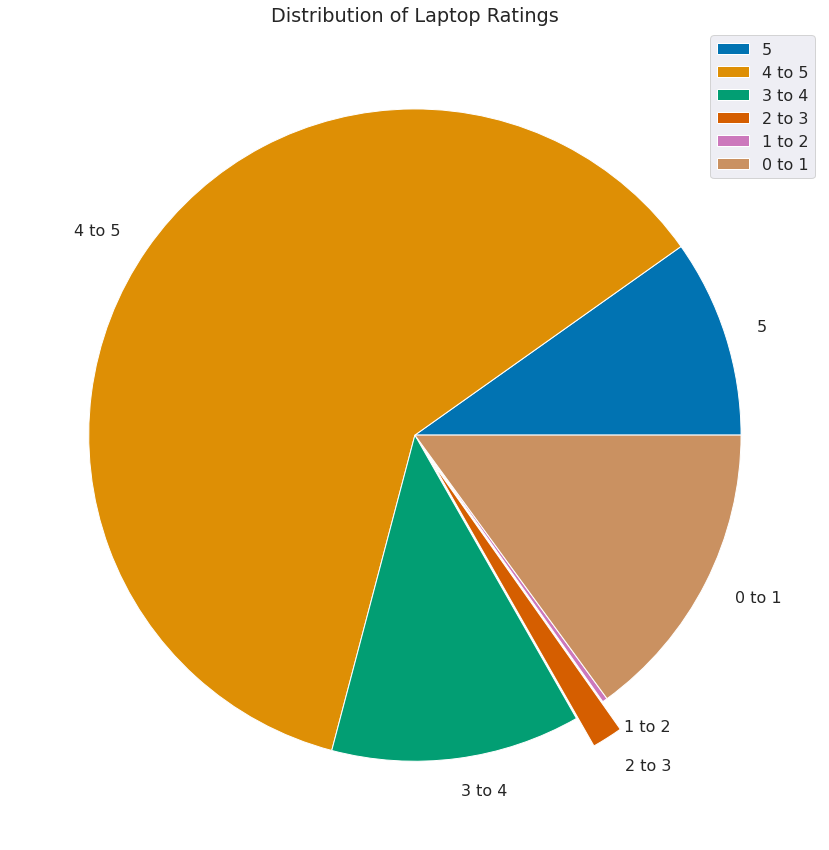

In [ ]:
# define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')
# plotting data on chart
explode = [0,0,0,0.1,0,0]
plt.pie(rating_dict.values(), labels=rating_dict.keys(), colors=palette_color,explode=explode)
plt.title("Distribution of Laptop Ratings")
plt.legend()
plt.show()

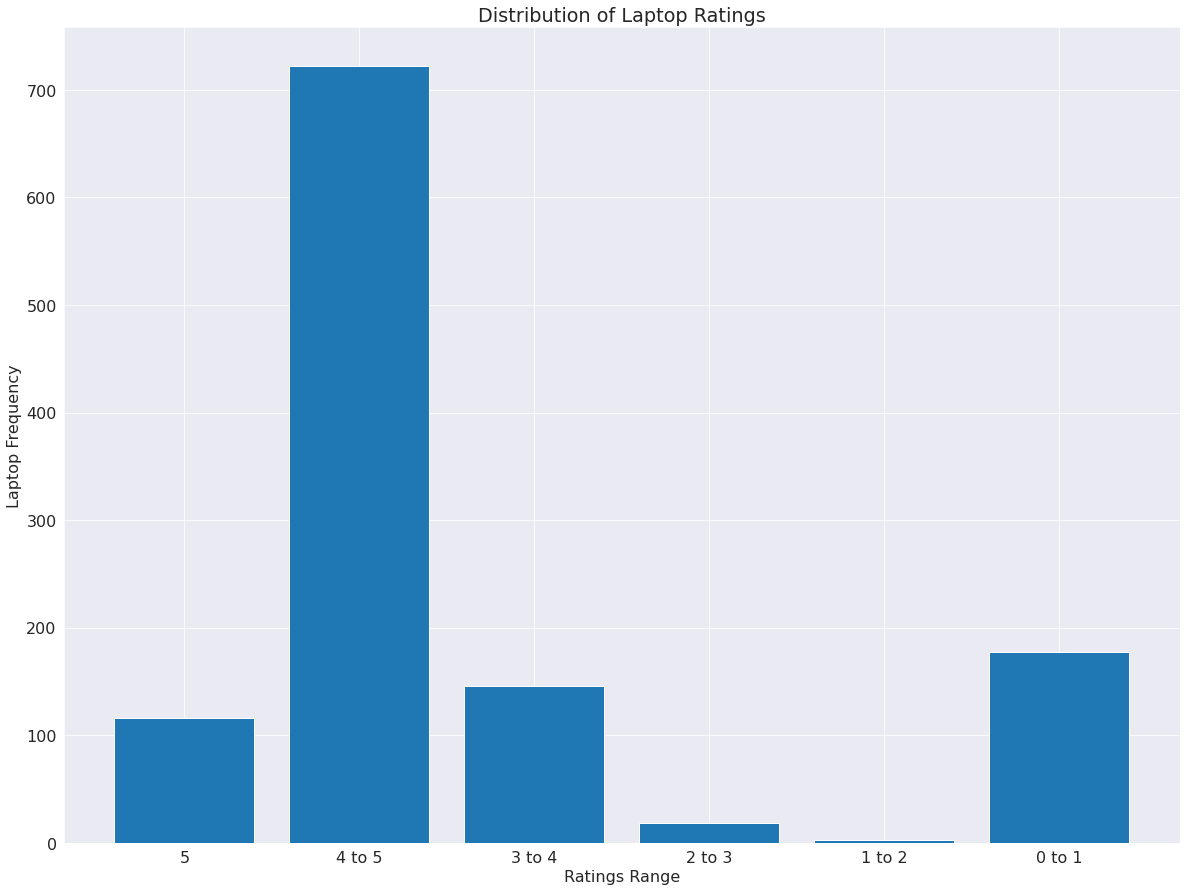

In [ ]:
names = list(rating_dict.keys())
values = list(rating_dict.values())

plt.bar(range(len(rating_dict)), values, tick_label=names)
plt.xlabel("Ratings Range")
plt.ylabel("Laptop Frequency")
plt.title("Distribution of Laptop Ratings")
plt.show()

From these above two plots we can see the distribution of laptops based on their ratings, it can be seen that most of the laptops are rated between values 4 and 5.

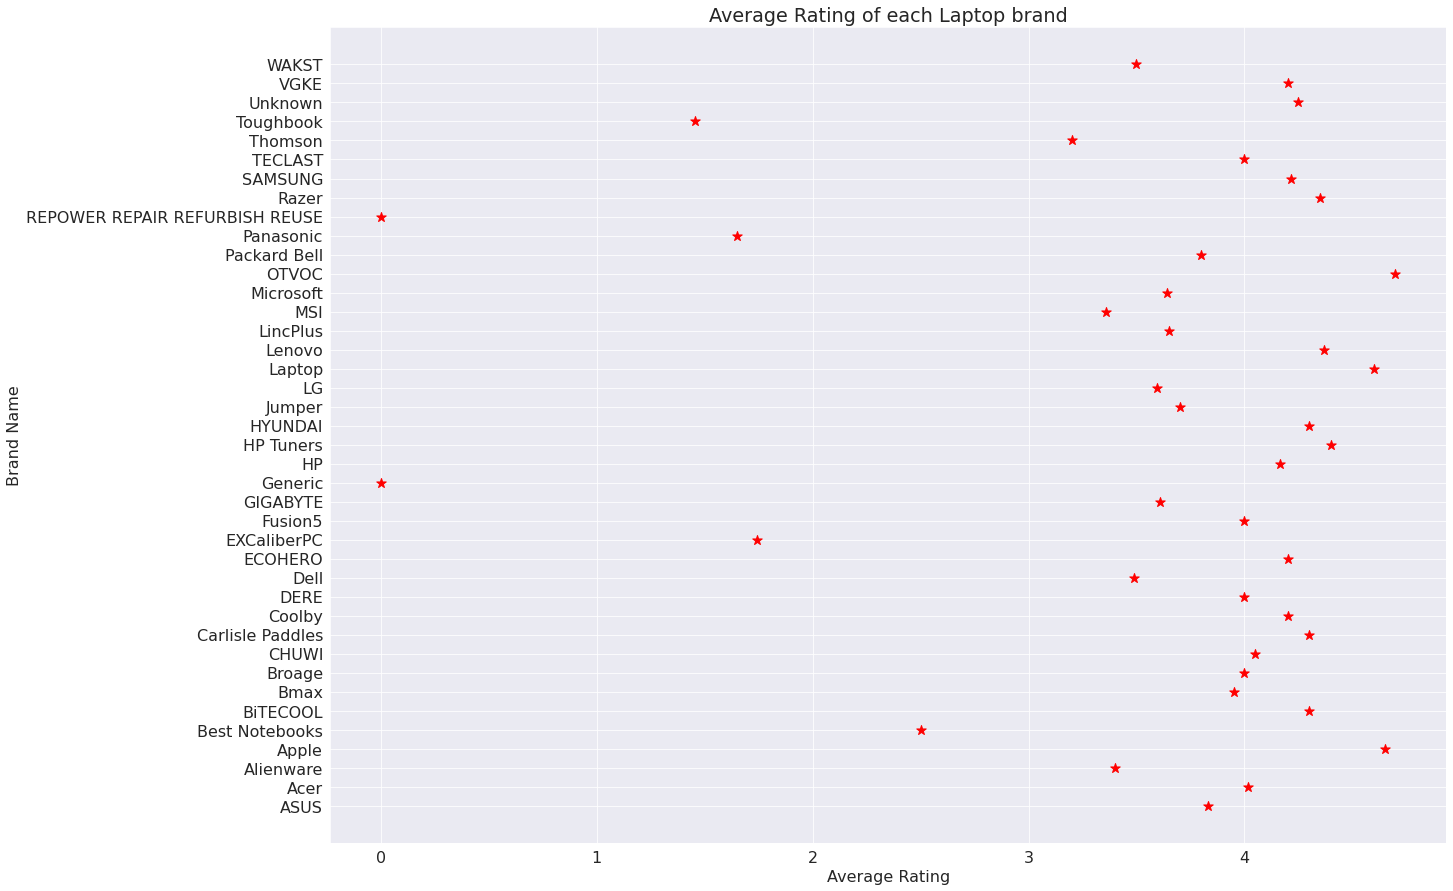

In [ ]:
grouped_brands = df_cleaned.groupby("Brand").mean()
# sns.scatterplot(y=grouped_brands.index,x=grouped_brands.Rating,color="r")
plt.scatter(x=grouped_brands.Rating,y=grouped_brands.index, s=100,marker="*",color="r")
plt.xlabel("Average Rating")
plt.ylabel("Brand Name")
plt.title("Average Rating of each Laptop brand")
plt.show()

From this plot, it can be seen that Apple has the highest average rating among all the brands. Also, the generic and repower-repair-refurbished-reused laptops are unrated laptop brands

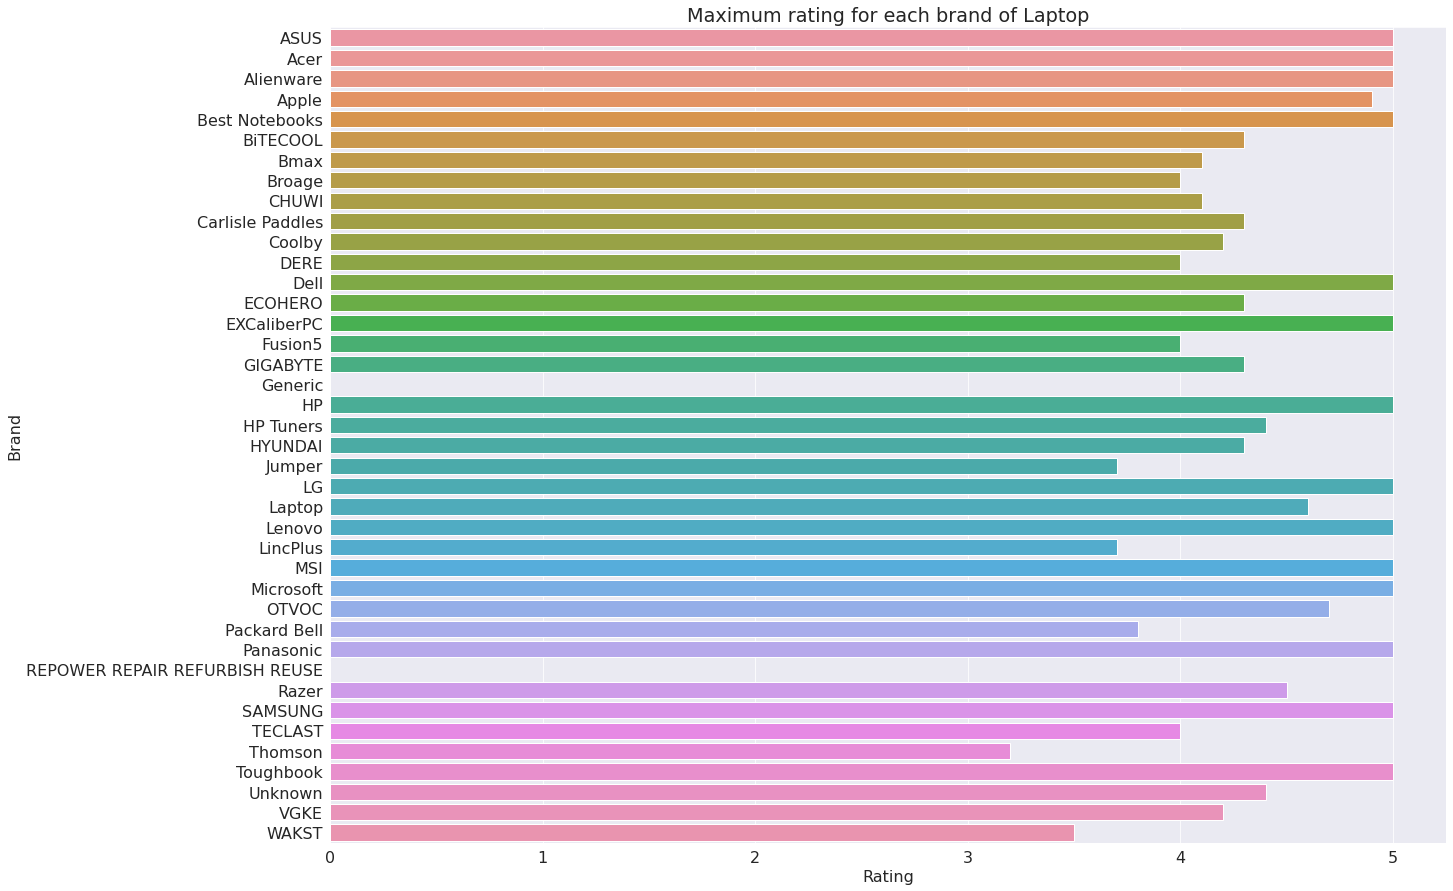

In [ ]:
grouped_brands = df_cleaned.groupby("Brand").max()
sns.barplot(y=grouped_brands.index,x=grouped_brands.Rating, orient='h')
plt.title("Maximum rating for each brand of Laptop")
plt.show()

The above two plots show the average rating of each laptop brand and maximum rating for each laptop brand. Here from max rating plot we can see that laptops of different brands have recieved max rating of 5. Also, some unrated laptop brands are also present in dataset

## Ram vs Price 

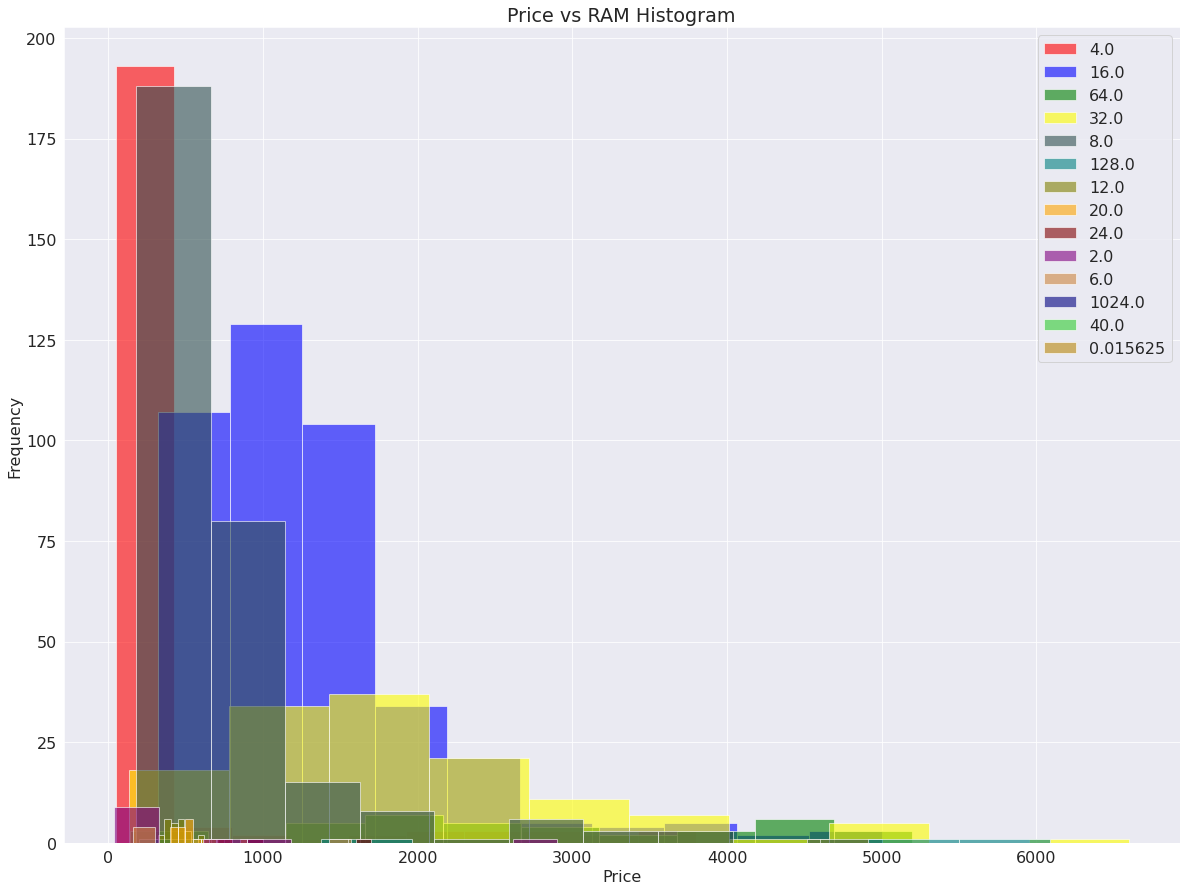

In [ ]:
unique_rams = df_cleaned['Ram'].unique()
colors = ['red', 'blue', 'green', 'yellow', 'darkslategrey','teal','olive','orange','maroon','purple','peru','navy','limegreen','darkgoldenrod']

for i, ram in enumerate(unique_rams):
    subset = df_cleaned[df_cleaned['Ram'] == ram]
    plt.hist(subset['Price_dollar'], alpha=0.6, color=colors[i % len(colors)], label=str(ram))

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price vs RAM Histogram')
plt.legend()
plt.show()

The above plot shows that the most commonly used RAMS are 4GB, 8GB and 16GB RAMS